# X Means 
#### from: https://github.com/annoviko/pyclustering/

In [1]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
import numpy as np
import pandas

## ```Cyclist``` Dataset

In [2]:
# Assuming the dataset is in a CSV file named 'cyclists.csv'
cyclists_df = pandas.read_csv('../dataset/cyclists_outlier.csv')

numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns

# Specify the columns to keep
columns_to_keep = ["avg_relative_position", "career_level", "relative_position_std"] 
# new dataset with only the specified columns
all_cyclists_df = cyclists_df
cyclists_df = cyclists_df[columns_to_keep]

#### **Features normalization**


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,avg_relative_position,career_level,relative_position_std
0,0.456286,0.899462,0.243635
1,0.630686,-0.572894,0.205735
2,0.557360,-0.123706,0.219011
3,0.464642,-0.502688,0.238795
4,0.589817,-0.152291,0.238517
...,...,...,...
4140,0.510309,-0.496200,0.340690
4141,0.637519,-0.593160,0.215697
4142,0.697735,-0.600964,0.150866
4143,0.413682,-0.303189,0.238513


In [4]:
start_centroids = 2
initial_centers = kmeans_plusplus_initializer(cyclist_normalized_df, start_centroids).initialize()

#With k max = 200, it gives 200 clusters! Seems returing always the max number of clusters
#x_means = xmeans(cyclist_normalized_df, start_clusters, tolerance=1e-6, kmax=200, repeat=10, random_state=42)


x_means = xmeans(cyclist_normalized_df, initial_centers, kmax=8, tolerance=0.27, repeat=50, random_state=42, ccore=False)
x_means.process()
 


In [5]:
# Extract clustering results: clusters and their centers
clusters = x_means.get_clusters()
centers = x_means.get_centers()

for i, cluster in enumerate(clusters):
    print(f"Cluster {i} shape: {len(cluster)}")

Cluster 0 shape: 1116
Cluster 1 shape: 777
Cluster 2 shape: 557
Cluster 3 shape: 174
Cluster 4 shape: 42
Cluster 5 shape: 1010
Cluster 6 shape: 361
Cluster 7 shape: 108


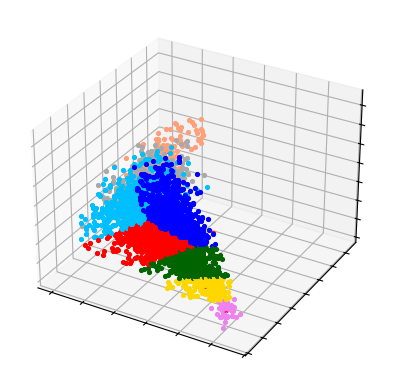

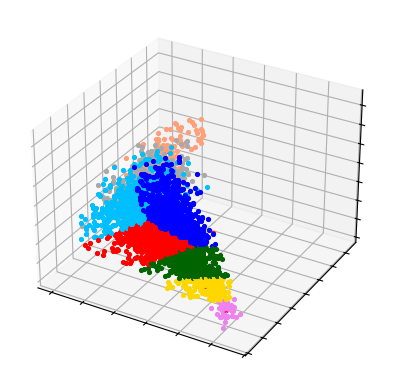

In [6]:
# Visualize clustering results in 3D
visualizer = cluster_visualizer()

# Append clusters
visualizer.append_clusters(clusters, cyclist_normalized_df)

# Append cluster centers with different marker style
visualizer.append_cluster(centers, None, marker='*', markersize=10)

# Display the final plot
visualizer.show()


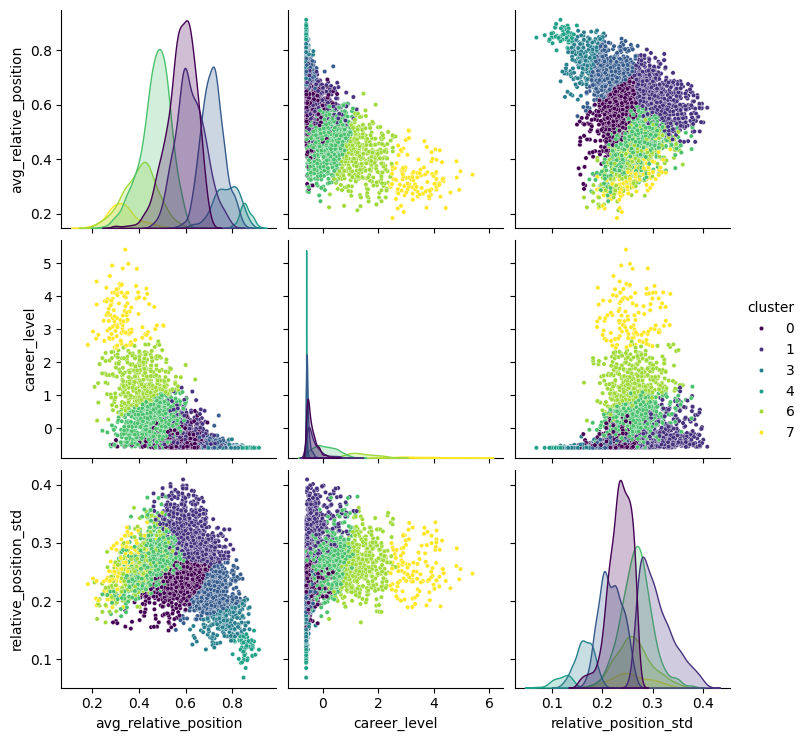

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = x_means.predict(cyclist_normalized_df)
labels = pandas.DataFrame(labels, columns=["cluster"])

cyclist_normalized_df_with_labels = pandas.DataFrame(cyclist_normalized_df, columns=cyclists_df.columns)
cyclist_normalized_df_with_labels["cluster"] = labels["cluster"]

# Combine the normalized data with the original data
combined_df = pandas.concat([cyclists_df, cyclist_normalized_df_with_labels["cluster"]], axis=1)

# Create a pairplot
sns.pairplot(combined_df, hue="cluster", vars=columns_to_keep, palette="viridis", plot_kws={'s': 10, 'alpha': 1.0})
plt.show()



In [8]:
labels = {}
clusters = x_means.get_clusters()
n_clusters = np.shape(clusters)[0]
#transforming each cluster list from [[cluster1 m points], ...., [clustern p points]] to [[1,1,,....,1 m times], [n,....,n p times]] 
#to {point1:labelcluster1,...., pointm:labelcluster1, ....., point1:labelclustern, ...., pointp:labelclustern} sorted by number of example.
for cluster_label in range(0, n_clusters):
  for i in range(0, len(clusters[cluster_label])):
      labels[clusters[cluster_label][i]] = cluster_label

labels = dict(sorted(labels.items()))
xmeans_labels = list(labels.values())

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [ ]:
print('Separation %s' % metrics.davies_bouldin_score(cyclist_normalized_df, xmeans_labels)) # lower value, better clustering (minimum zero)
print('Silhouette %s' % silhouette_score(cyclist_normalized_df, xmeans_labels))

Separation 1.5469668353702986
Silhouette 0.2876653599956561


In [ ]:
# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(np.array(xmeans_labels) == k))

print('cluster occurrencies:', occ_list)

cluster occurrencies: [45458, 9663, 3423, 7089, 28469, 7276, 5245, 10835, 18250, 30956]


Plot of cluster labels distribution

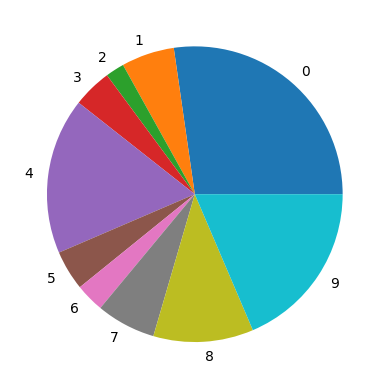

In [ ]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show() 